**Install & Import**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()


Saving Faces.zip to Faces.zip


{'Faces.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00\x1c\x9eR\\\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00 \x00Faces/ux\x0b\x00\x01\x04\x00\x00\x00\x00\x04\x00\x00\x00\x00UT\r\x00\x07Q\xca\x95i\x98\xd4\x95i\xc2\xbf\x95iPK\x03\x04\x14\x00\x00\x00\x00\x004\x9eR\\\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0f\x00 \x00Faces/Negative/ux\x0b\x00\x01\x04\x00\x00\x00\x00\x04\x00\x00\x00\x00UT\r\x00\x07}\xca\x95i\x98\xd4\x95i\xc9\xc8\x95iPK\x03\x04\x14\x00\x08\x00\x08\x00\xc3\x98R\\\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\'\x00 \x00Faces/Negative/PrivateTest_10247676.jpgux\x0b\x00\x01\x04\x00\x00\x00\x00\x04\x00\x00\x00\x00UT\r\x00\x07F\xc0\x95i\xac\xca\x95i\x8e\xee\x13_\x01\x95\x05j\xfa\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x0

Load Dataset

In [ ]:
!unzip Faces.zip
!ls

Archive:  Faces.zip
   creating: Faces/
   creating: Faces/Negative/
  inflating: Faces/Negative/PrivateTest_10247676.jpg  
  inflating: Faces/Negative/PrivateTest_10455506.jpg  
  inflating: Faces/Negative/PrivateTest_10658656.jpg  
  inflating: Faces/Negative/PrivateTest_10702106.jpg  
  inflating: Faces/Negative/PrivateTest_10814167.jpg  
  inflating: Faces/Negative/PrivateTest_11080550.jpg  
  inflating: Faces/Negative/PrivateTest_11127811.jpg  
  inflating: Faces/Negative/PrivateTest_11149326.jpg  
  inflating: Faces/Negative/PrivateTest_11164632.jpg  
  inflating: Faces/Negative/PrivateTest_11574818.jpg  
  inflating: Faces/Negative/PrivateTest_11603346.jpg  
  inflating: Faces/Negative/PrivateTest_11661249.jpg  
  inflating: Faces/Negative/PrivateTest_11715431.jpg  
  inflating: Faces/Negative/PrivateTest_11721576.jpg  
  inflating: Faces/Negative/PrivateTest_11761292.jpg  
  inflating: Faces/Negative/PrivateTest_11825918.jpg  
  inflating: Faces/Negative/PrivateTest_11898126.jp

In [ ]:
img_size = 48
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_data = datagen.flow_from_directory(
    "Faces",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

test_data = datagen.flow_from_directory(
    "Faces",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)


Found 648 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,331 (1.36 MB)

 Trainable params: 355,331 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(patience=4, restore_best_weights=True)

history = model.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[early_stop]
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.2874 - loss: 1.1224 - val_accuracy: 0.3333 - val_loss: 1.0982
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.3208 - loss: 1.0997 - val_accuracy: 0.3333 - val_loss: 1.0984
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.3469 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0982
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.3243 - loss: 1.0990 - val_accuracy: 0.3889 - val_loss: 1.0968
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.3469 - loss: 1.0985 - val_accuracy: 0.3333 - val_loss: 1.0862
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.3745 - loss: 1.0896 - val_accuracy: 0.4861 - val_loss: 1.0751
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.3902 - loss: 1.0721 - val_accuracy: 0.4583 - val_loss: 1.0103
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.4398 - loss: 1.0599 - val_accuracy: 0.4722 - val_

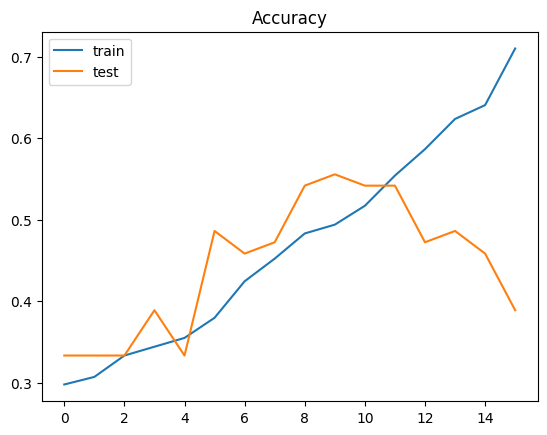

In [ ]:
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="test")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
loss, acc = model.evaluate(test_data)
print("Test accuracy:", acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4974 - loss: 1.0115
Test accuracy: 0.5416666865348816


In [ ]:
model.save("emotion_model.h5")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("emotion_model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpnqf930g7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132484621208848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132484621209616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132484621209232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132484621211728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132484621210960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132484621212688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132484621212112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132484621212304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132484621212496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132484621213648: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
from google.colab import files

files.download("emotion_model.h5")
files.download("emotion_model.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>